---
title: "12-SAS 相关与回归分析"
author: "Simon Zhou"
date: "2025-06-03"
date-modified: "2025-06-03"
format: 
    html:
        code-fold: true
        code-line-numbers: true
        code-highlight: true
        fig_caption: true
        number-sections: true
        toc: true
        toc-depth: 3
---

In [1]:
%load_ext saspy.sas_magic

## 直线相关分析

两个变量之间的相关关系分析可以使用 corr过程。如两个变量都来自正态分布的总体,可以作直线相关分析,计算 Pearson 相关系数。

以下数据和程序用来说明如何计算直线相关系数。

数据集可从 [Data-collection](https://github.com/zhoulvbang/DATA-collection/tree/main/SAS) 处下载。

如可以选择如下方式载入数据集：

1. 数据集载入 libname 目录下：

```sas
libname libname ‘C:\syp\data’;
data = dataset;
    set libname.spec-data;
    where spec-condition;
    keep var1 var2...;
    drop var1 var2...;
    format var1 dollar12. var2 monyy.;
run;
```

程序说明：
- `libname` 语句定义了将在 SAS 的环境中的 SAS 资源管理器下新建一个工作目录；
- `‘C:\syp\data’` 是数据集所在的路径，指定了你想要导入的数据；
- `data = dataset` 是创建一个新的数据集，`dataset` 是数据集的名称；
- `set libname.spec-data` 是从指定的库中读取数据集；
- `where spec-condition` 是指定数据集的条件筛选；
- `keep var1 var2...` 是指定保留的数据变量；
- `drop var1 var2...` 是指定删除的数据变量；
- `format var1 dollar12. var2 monyy.` 是指定变量的格式。
- `run;` 语句结束数据步。

2. 或者直接使用 infile 语句读取数据：

```sas
data 数据集名;
    infile ‘文件路径+文件名’ <可选参数>;
    input 变量1 变量2...;
run;
```

In [2]:
%%SAS
data prg7_1;
    input x y @@;
cards;
12.81 10.23
11.89 10.01
13.51 11.02
10.82 9.08
14.12 12.89
12.53 11.28
11.94 10.59
11.23 10.88
14.72 12.6
12.45 11.26
11.30 10.02
12.08 11.55
;
proc corr;
    var x y;
run;

Using SAS Config named: winlocal
SAS Connection established. Subprocess id is 17040



### 结果说明

`corr` 过程首先给出两个变量的一些简单统计量,如例数、均数、标准差、总和、最小值和最大值。

随后输出相关分析的结果,结果中有 Pearson 相关系数,即直线相关系数,还有判断该相关系数是否来自总体相关系数为0的总体假设检验的 *P* 值(当 $H_0:Rho=0$ 时,$Prob>r$),这两个值位于两个变量名所交叉处,相关系数位于上方,检验结果的 *P* 值位于下方。

这里 Pearson 相关系数为 r=0.815 99,所对应的 P=0.001 2<0.05说明两个变量之间存在正相关关系,即一个变量的值增大时,另一个变量的值也相应增大。

## 直线回归分析

直线回归分析是研究一个因变量与一个或多个自变量之间的线性关系。SAS 中可以使用 `reg` 过程和 `nlin` 过程进行直线回归分析。

直线回归分析是回归分析中较为简单的一种,即两个变量的数值在散点图上呈直线变化,完成直线回归可用 `reg` 过程。


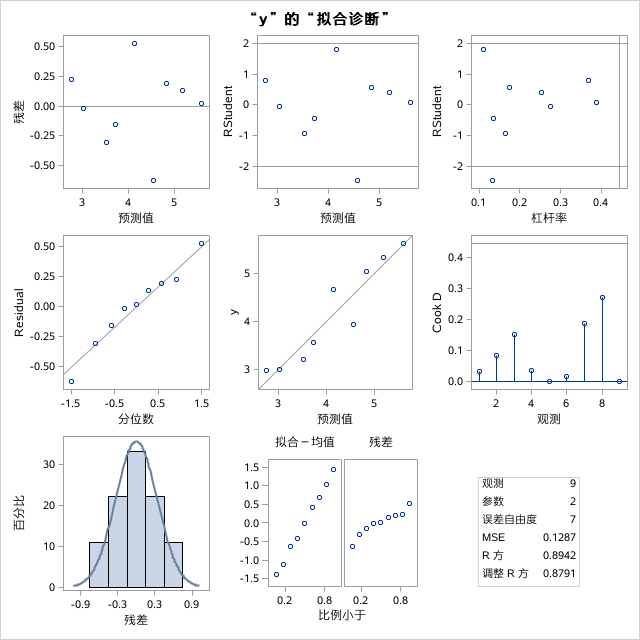
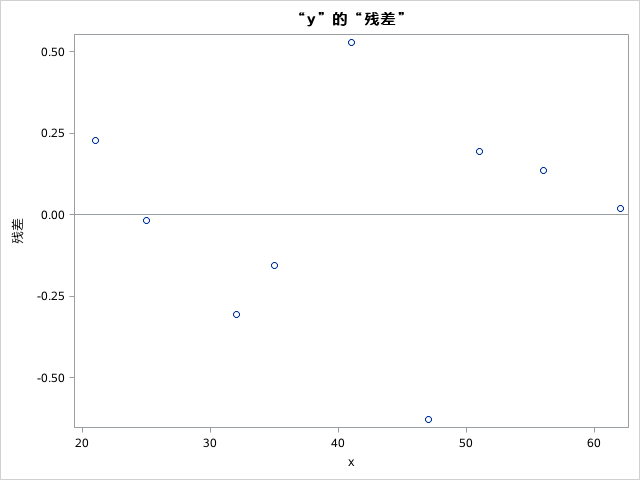
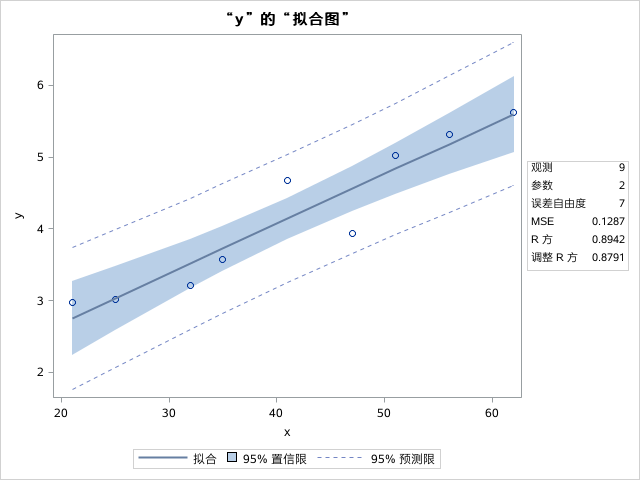

In [3]:
%%SAS
data prg_reg;
    input x y @@;
cards;
56 5.32 32 3.21 41 4.67 51 5.03 25 3.01
35 3.57 21 2.98 47 3.93 62 5.62
;
proc reg;
    model y = x;
run;

### model 语句常用选项

1. `stb` 选项：`model y = x / stb` 计算标准化回归系数,即将自变量和因变量都标准化后进行回归分析,得到的回归系数可以直接比较各个自变量对因变量的影响大小。
2. `p` 选项：`model y = x / p` 计算预测值和残差,即在回归分析中计算每个观测值的预测值和残差,可以用于评估模型的拟合效果。
3. `clb` 选项：`model y = x / clb` 计算回归系数的置信区间,即在回归分析中计算每个回归系数的置信区间,可以用于评估回归系数的可靠性。